In [1]:
import pandas as pd
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import spacy

In [21]:
df = pd.read_csv("lastconferences.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Key                   1292 non-null   object 
 1   Item Type             1292 non-null   object 
 2   Publication Year      1292 non-null   int64  
 3   Author                1292 non-null   object 
 4   Title                 1292 non-null   object 
 5   Publication Title     1292 non-null   object 
 6   ISBN                  359 non-null    object 
 7   ISSN                  0 non-null      float64
 8   DOI                   1292 non-null   object 
 9   Url                   55 non-null     object 
 10  Abstract Note         1292 non-null   object 
 11  Date                  1292 non-null   object 
 12  Date Added            1292 non-null   object 
 13  Date Modified         1292 non-null   object 
 14  Access Date           0 non-null      float64
 15  Pages                

In [39]:
df['Publication Year'].describe()

count    1292.0
mean     2022.0
std         0.0
min      2022.0
25%      2022.0
50%      2022.0
75%      2022.0
max      2022.0
Name: Publication Year, dtype: float64

In [4]:
df = df.dropna(subset=['Authors','Abstract','Author Keywords','Index Keywords'])

In [4]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

In [50]:
# Words to exclude
exclude_words = {"network","propose","proposed","using","model","via","based","paper","system","data","user"} #{"software", "defined", "network", 'networks','networking','using','g', "sdn", "software-defined",'based','enabled','system','service'}

In [51]:
# Initialize a dictionary to store keywords by year
keywords_by_year = defaultdict(list)

In [52]:
# Process titles and extract keywords
for index, row in df.iterrows():
    doc = nlp(row["Abstract Note"])
    keywords = [token.text.lower() for token in doc if
                token.text.lower() not in exclude_words and re.match(r"^[a-zA-Z]+$", token.text)]
    keywords_by_year[row["Publication Year"]].extend(keywords)

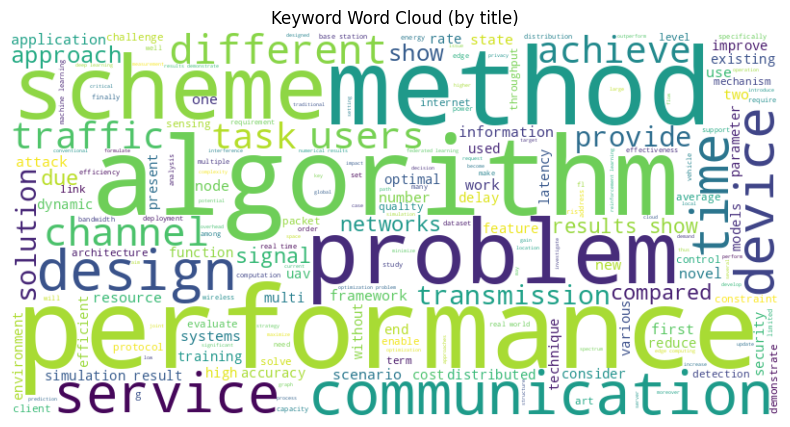

In [53]:
# Create word clouds for each year
#for year, keywords in keywords_by_year.items():
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords_by_year[2022]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title(f"Keyword Word Cloud (by title)")
plt.axis("off")
plt.show()

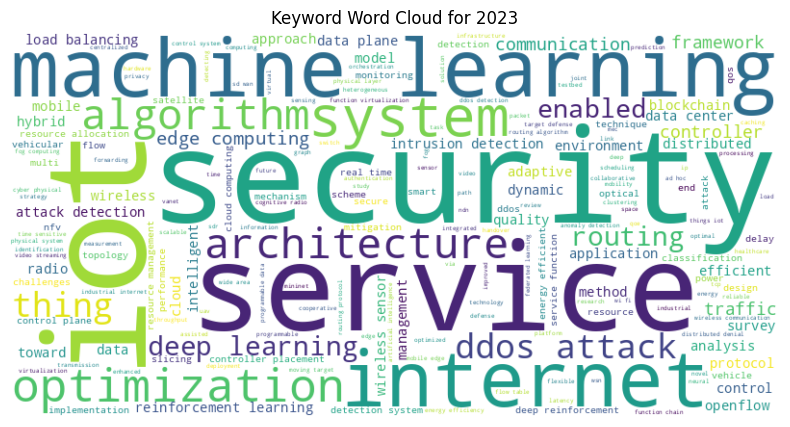

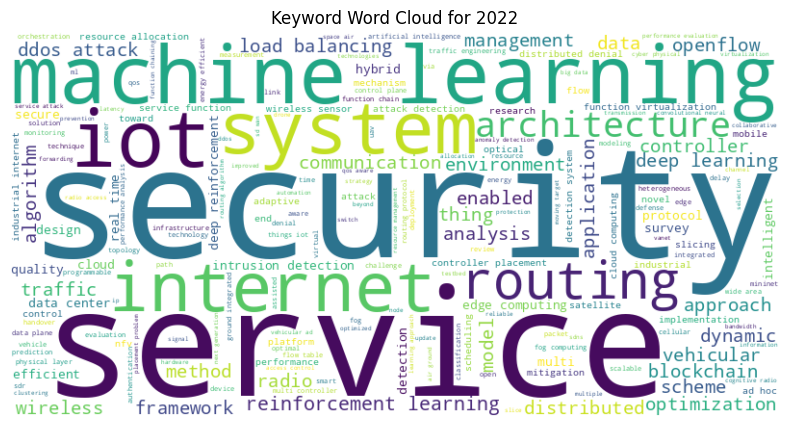

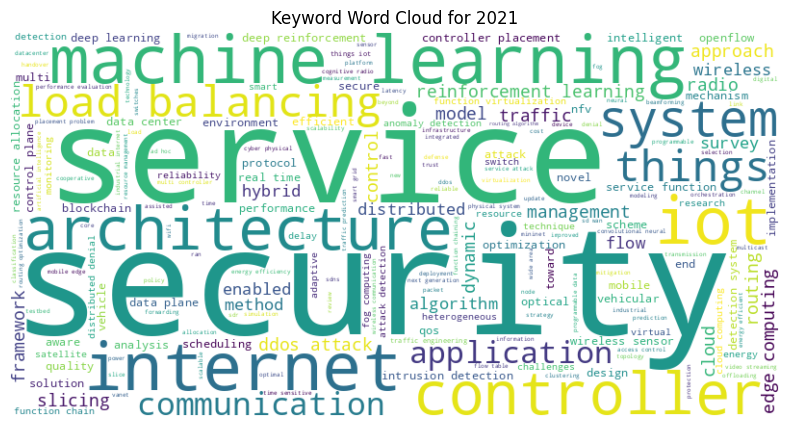

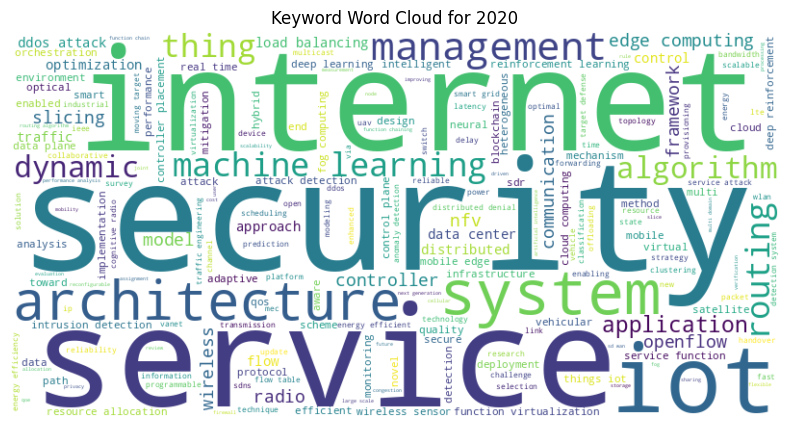

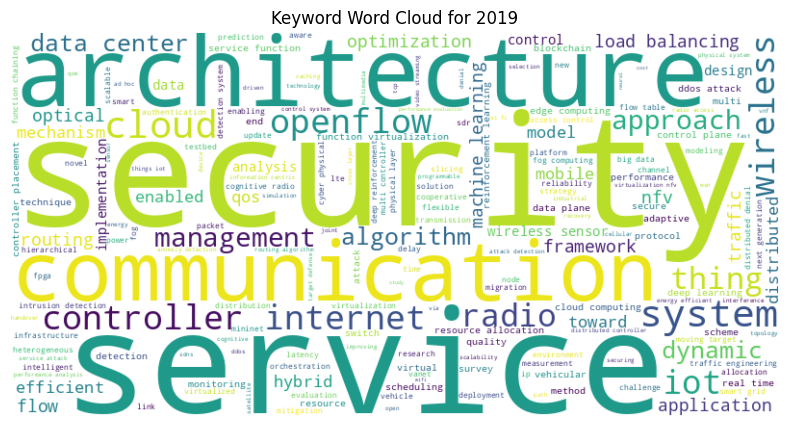

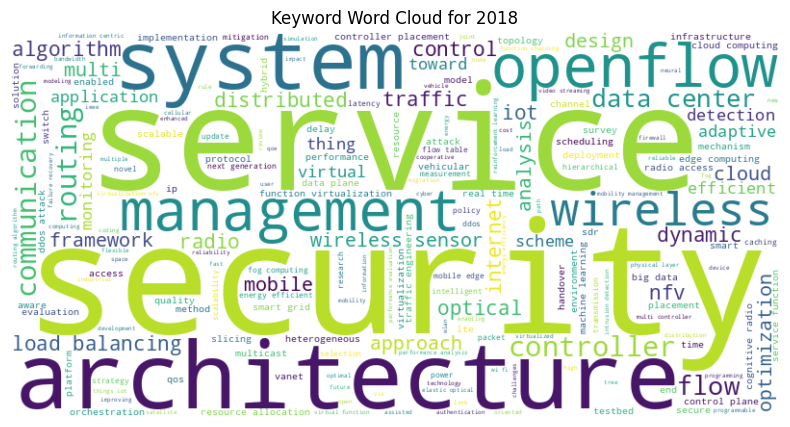

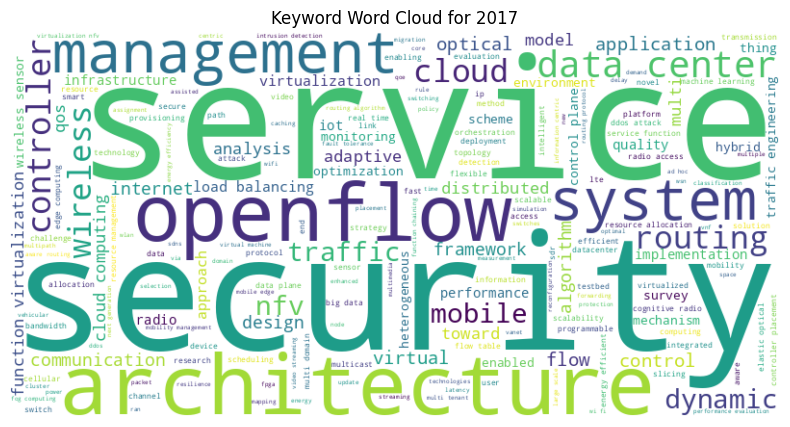

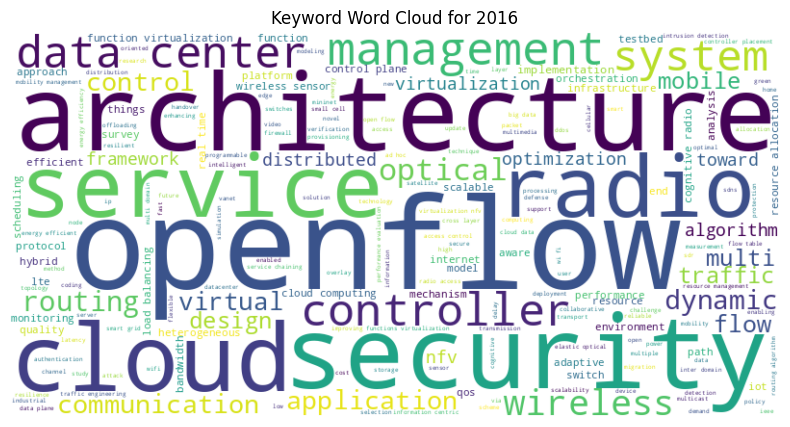

In [88]:
# Create word clouds for each year (by Author Keywords)
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud (by keyword) for {year}")
    plt.axis("off")
    plt.show()

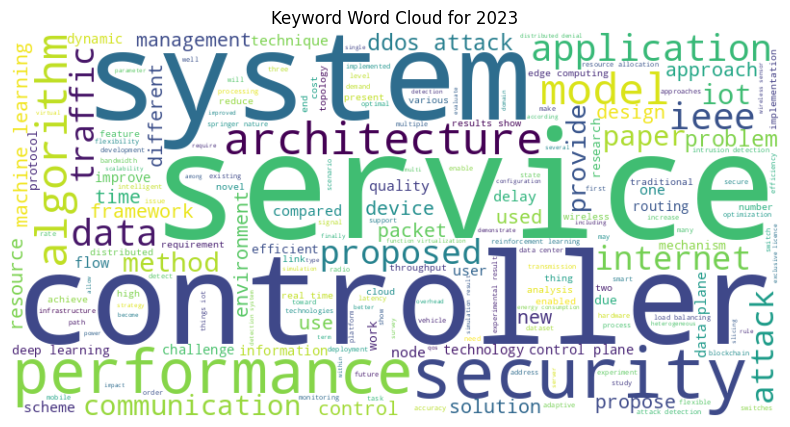

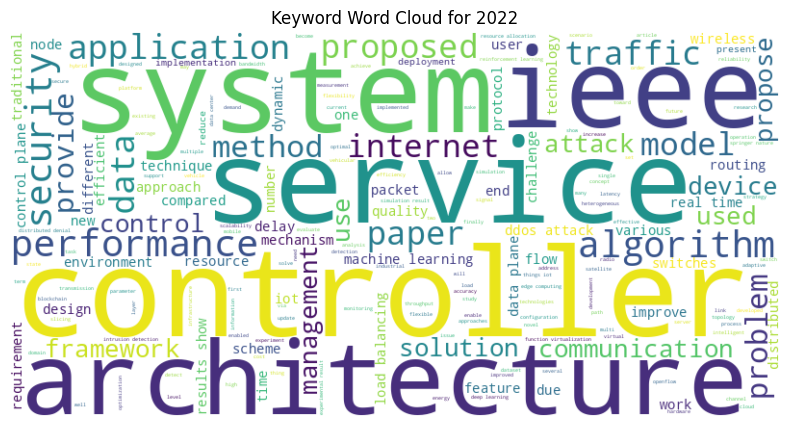

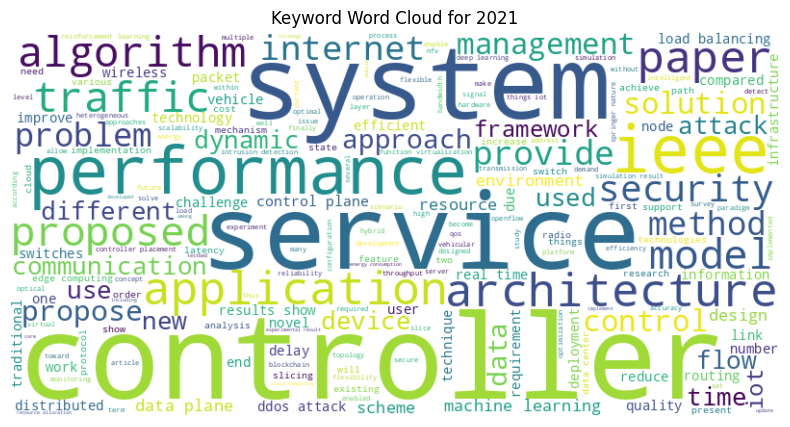

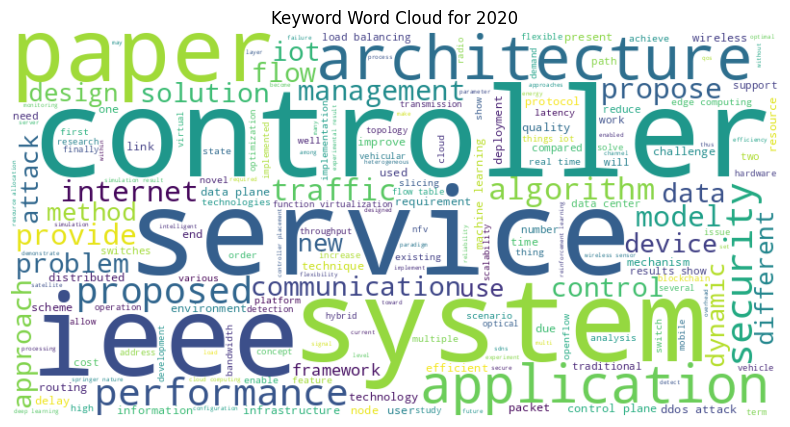

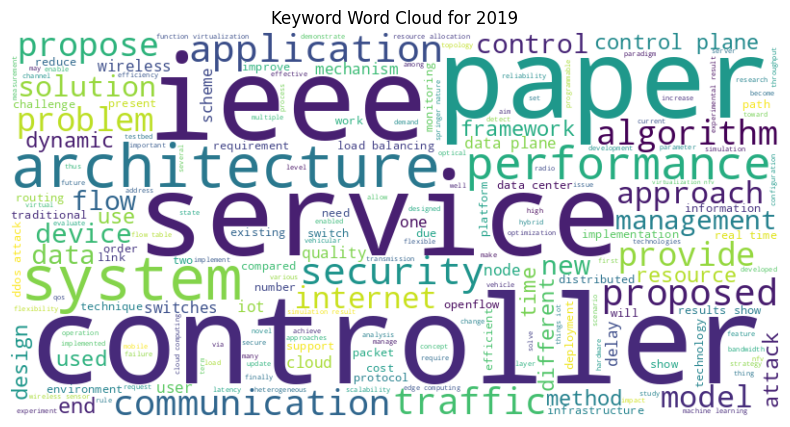

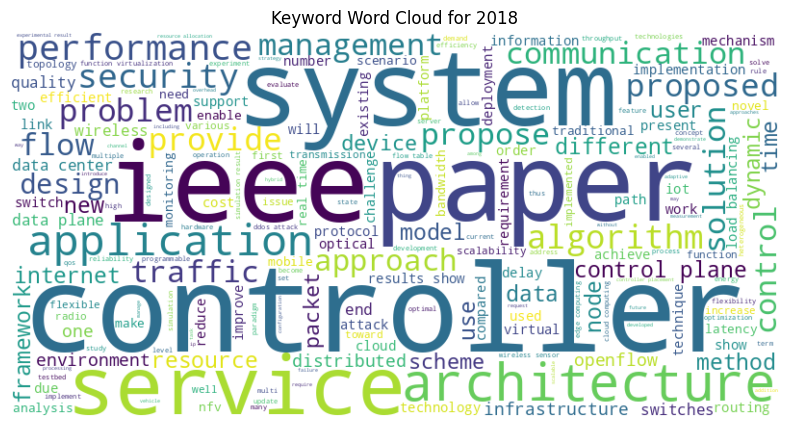

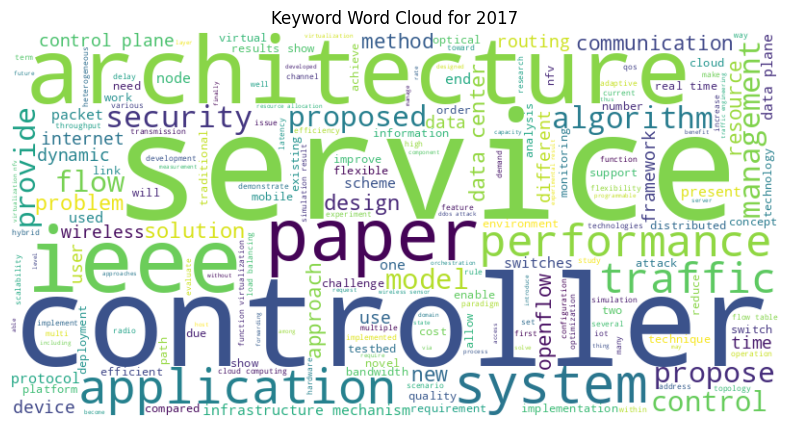

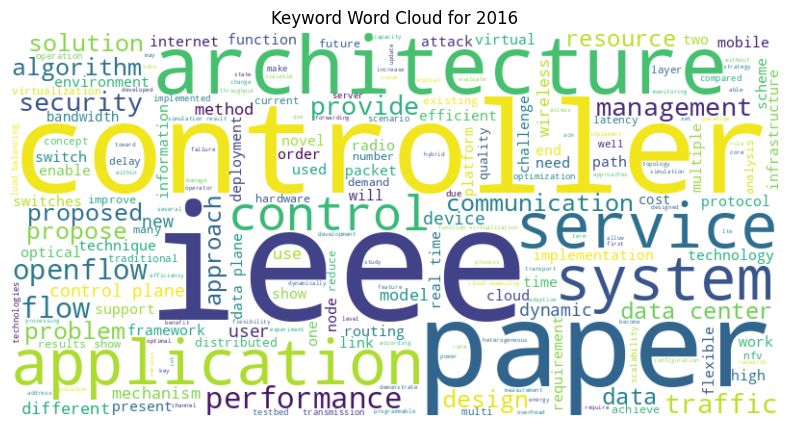

In [90]:
# Create word clouds for each year (by Author Keywords)
for year, keywords in keywords_by_year.items():
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Keyword Word Cloud (by abstract) for {year}")
    plt.axis("off")
    plt.show()